# Insurance charges prediction
1 BUSINESS TASK: The goal of this project is to predict the premium charges of a prospective insuree with the help of data collected from the insuree.


2 DATA COLLECTION AND UNDERSTANDING Data has been collected from Kaggle. The dataset includes 1338 rows × 13 columns from 4 regions.

3 DATA EXPLORATION In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting premium charges by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it. Below are tasks to be performed in EDA:

Importing Libraries

Data Cleaning for EDA Report

Exploratory Data Analysis (EDA) on all Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

C:\Users\birth\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset = pd.read_csv(r'D:\1DataScience\Insurance prediction\new_insurance_data.csv')

In [3]:
dataset

age     sex     bmi  children smoker  Claim_Amount  past_consultations  \
0     18.0    male  23.210       0.0     no   29087.54313                17.0   
1     18.0    male  30.140       0.0     no   39053.67437                 7.0   
2     18.0    male  33.330       0.0     no   39023.62759                19.0   
3     18.0    male  33.660       0.0     no   28185.39332                11.0   
4     18.0    male  34.100       0.0     no   14697.85941                16.0   
...    ...     ...     ...       ...    ...           ...                 ...   
1333  33.0  female  35.530       0.0    yes   63142.25346                32.0   
1334  31.0  female  38.095       1.0    yes   43419.95227                31.0   
1335  52.0    male  34.485       3.0    yes   52458.92353                25.0   
1336  45.0    male  30.360       0.0    yes   69927.51664                34.0   
1337  54.0  female  47.410       0.0    yes   63982.80926                31.0   

      num_of_steps  Hospital_expenditure  NUmber_of_past_hospitalizations  \
0         715428.0          4.720921e+06                              0.0   
1         699157.0          4.329832e+06                              0.0   
2         702341.0          6.884861e+06                              0.0   
3         700250.0          4.274774e+06                              0.0   
4         711584.0          3.787294e+06                              0.0   
...            ...                   ...                              ...   
1333     1091267.0          1.703805e+08                              2.0   
1334     1107872.0          2.015152e+08                              2.0   
1335     1092005.0          2.236450e+08                              2.0   
1336     1106821.0          2.528924e+08                              3.0   
1337     1100328.0          2.616317e+08                              3.0   

      Anual_Salary     region      charges  
0     5.578497e+07  southeast   1121.87390  
1     1.370089e+07  southeast   1131.50660  
2     7.352311e+07  southeast   1135.94070  
3     7.581968e+07  southeast   1136.39940  
4     2.301232e+07  southeast   1137.01100  
...            ...        ...          ...  
1333  3.101107e+09  northwest  55135.40209  
1334  3.484216e+09  northeast  58571.07448  
1335  3.640807e+09  northwest  60021.39897  
1336  4.006359e+09  southeast  62592.87309  
1337  4.117197e+09  southeast  63770.42801  

[1338 rows x 13 columns]

# To find the null values in the data we need to use

In [4]:
dataset.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

# To know what to replace/impute(mean, median, mode) the null values with we first need to know the data type and we should also know if the data is distributed normally or skewed

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'Claim_Amount'}>,
        <Axes: title={'center': 'past_consultations'}>,
        <Axes: title={'center': 'num_of_steps'}>],
       [<Axes: title={'center': 'Hospital_expenditure'}>,
        <Axes: title={'center': 'NUmber_of_past_hospitalizations'}>,
        <Axes: title={'center': 'Anual_Salary'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

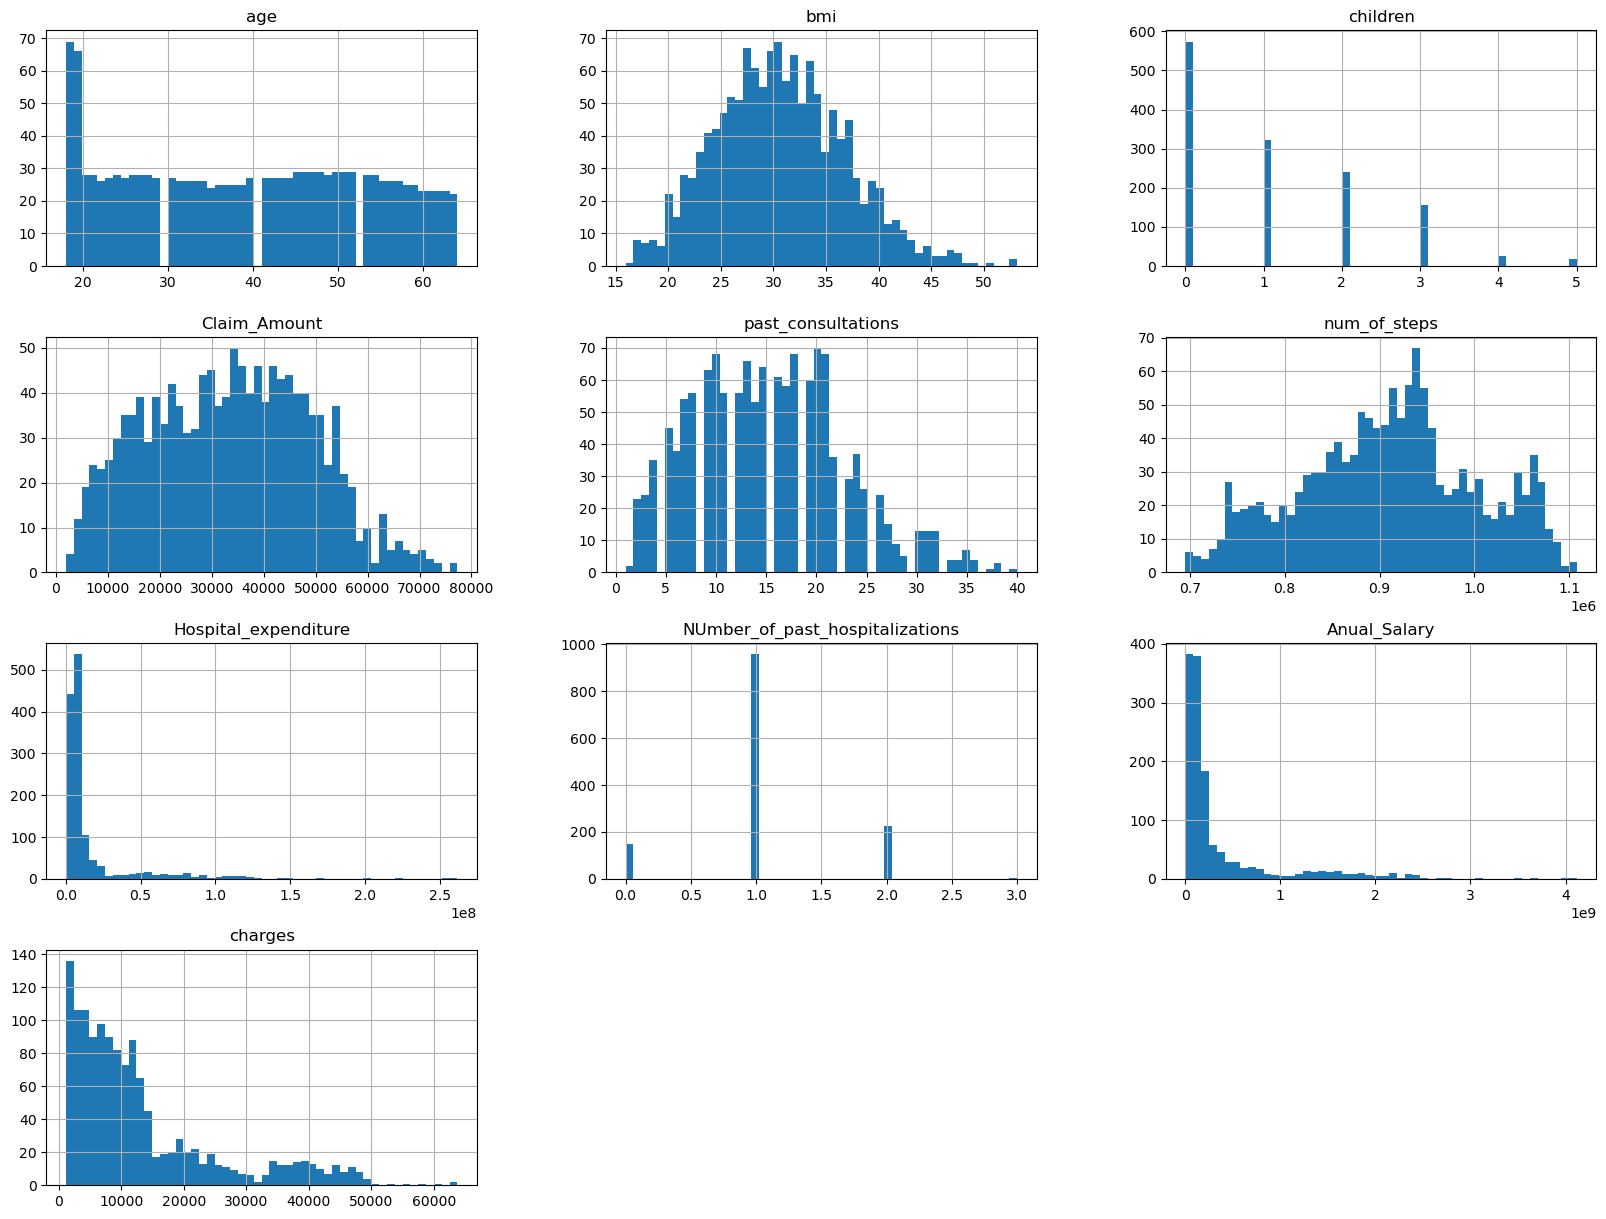

In [6]:

dataset.hist(bins=50, figsize=(20,15))

# Now replacing the null values with mean for normally distributed data and with median for the skewed data respectively

In [7]:
normal_distribution= ['age','bmi','Claim_Amount','past_consultations','num_of_steps' ]

for column in normal_distribution :
    # Calculate the mean of the current column
    column_mean = dataset[column].mean()
    
    # Replace null values with the mean in the current column
    dataset[column].fillna(column_mean, inplace=True)

In [8]:
Skewed_distribution = ['children','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary']
for column in Skewed_distribution :
    # Calculate the median of the current column
    column_median = dataset[column].median()
    
    # Replace null values with the median in the current column
    dataset[column].fillna(column_median, inplace=True)

# Checking if the null values have been replaced

In [9]:
dataset.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

# We see one of the column names has a small mistake 

In [10]:
dataset.rename(columns={'NUmber_of_past_hospitalizations': 'Past_hospitalizations'}, inplace=True)

# Checking if the datatypes of the columns are correct

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1338 non-null   float64
 1   sex                    1338 non-null   object 
 2   bmi                    1338 non-null   float64
 3   children               1338 non-null   float64
 4   smoker                 1338 non-null   object 
 5   Claim_Amount           1338 non-null   float64
 6   past_consultations     1338 non-null   float64
 7   num_of_steps           1338 non-null   float64
 8   Hospital_expenditure   1338 non-null   float64
 9   Past_hospitalizations  1338 non-null   float64
 10  Anual_Salary           1338 non-null   float64
 11  region                 1338 non-null   object 
 12  charges                1338 non-null   float64
dtypes: float64(10), object(3)
memory usage: 136.0+ KB


# Checking all the unique values of the data

In [12]:
for column in dataset.columns:
    column_unique = dataset[column].unique()
    print(column,column_unique)

age [18.         19.         39.31000752 20.         21.         22.
 23.         24.         25.         26.         27.         28.
 29.         31.         30.         33.         32.         34.
 36.         37.         35.         38.         40.         39.
 41.         42.         43.         44.         46.         45.
 48.         47.         49.         50.         51.         52.
 53.         54.         55.         56.         57.         58.
 59.         60.         61.         62.         63.         64.        ]
sex ['male' 'female']
bmi [23.21       30.14       33.33       33.66       34.1        34.43
 37.29       41.14       43.01       53.13       19.8        20.3
 20.7        27.6        28.7        30.66511236 34.4        35.4
 31.1        35.53       36.85       20.79       26.73       17.48
 31.13       31.35       20.425      21.755      22.61       38.17
 38.28       25.175      25.555      39.16       39.82       40.26
 27.835      30.59       26.84       33.7

# We see that some of the integer columns are in float type

In [13]:
dataset[['age', 'children','past_consultations','num_of_steps','Past_hospitalizations']] = dataset[['age', 'children','past_consultations','num_of_steps','Past_hospitalizations']].astype('int64')

# Checking if all the column types have been corrected

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1338 non-null   int64  
 1   sex                    1338 non-null   object 
 2   bmi                    1338 non-null   float64
 3   children               1338 non-null   int64  
 4   smoker                 1338 non-null   object 
 5   Claim_Amount           1338 non-null   float64
 6   past_consultations     1338 non-null   int64  
 7   num_of_steps           1338 non-null   int64  
 8   Hospital_expenditure   1338 non-null   float64
 9   Past_hospitalizations  1338 non-null   int64  
 10  Anual_Salary           1338 non-null   float64
 11  region                 1338 non-null   object 
 12  charges                1338 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 136.0+ KB


In [15]:
dataset.describe().T

count          mean           std           min  \
age                    1338.0  3.930792e+01  1.398752e+01  1.800000e+01   
bmi                    1338.0  3.066511e+01  6.094840e+00  1.596000e+01   
children               1338.0  1.090433e+00  1.199619e+00  0.000000e+00   
Claim_Amount           1338.0  3.336133e+04  1.553531e+04  1.920136e+03   
past_consultations     1338.0  1.521525e+01  7.450962e+00  1.000000e+00   
num_of_steps           1338.0  9.100047e+05  9.178297e+04  6.954300e+05   
Hospital_expenditure   1338.0  1.581682e+07  2.665699e+07  2.945253e+04   
Past_hospitalizations  1338.0  1.060538e+00  5.331890e-01  0.000000e+00   
Anual_Salary           1338.0  3.686636e+08  5.658157e+08  2.747072e+06   
charges                1338.0  1.327042e+04  1.211001e+04  1.121874e+03   

                                25%           50%           75%           max  
age                    2.700000e+01  3.900000e+01  5.100000e+01  6.400000e+01  
bmi                    2.631500e+01  3.040000e+01  3.465625e+01  5.313000e+01  
children               0.000000e+00  1.000000e+00  2.000000e+00  5.000000e+00  
Claim_Amount           2.094765e+04  3.361129e+04  4.497887e+04  7.727799e+04  
past_consultations     9.000000e+00  1.500000e+01  2.000000e+01  4.000000e+01  
num_of_steps           8.474898e+05  9.140155e+05  9.715100e+05  1.107872e+06  
Hospital_expenditure   4.084941e+06  7.490337e+06  1.082630e+07  2.616317e+08  
Past_hospitalizations  1.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00  
Anual_Salary           7.755085e+07  1.419361e+08  3.225202e+08  4.117197e+09  
charges                4.740287e+03  9.382033e+03  1.663991e+04  6.377043e+04

In [16]:
dataset.describe(include = 'object').T

count unique        top  freq
sex     1338      2       male   676
smoker  1338      2         no  1064
region  1338      4  southeast   364

# Exploratory Data Analysis

# Checking for outliers

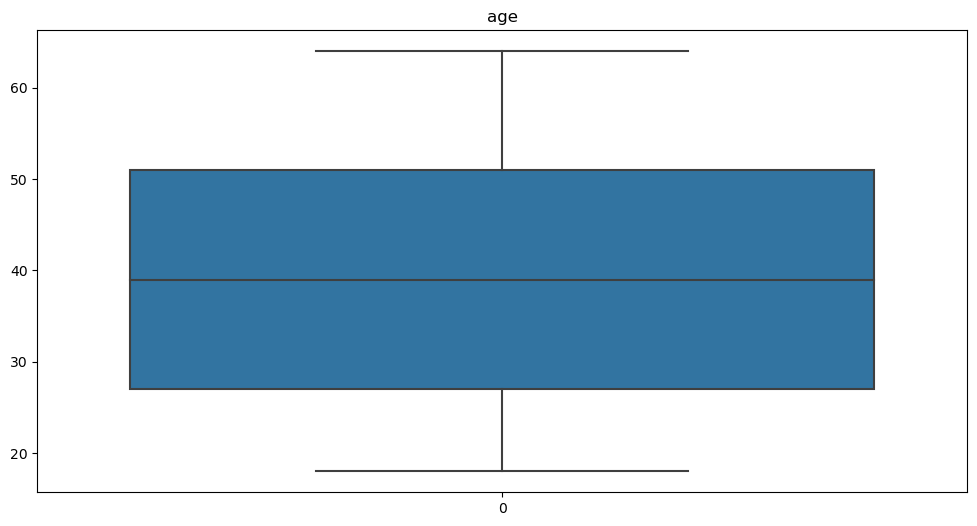

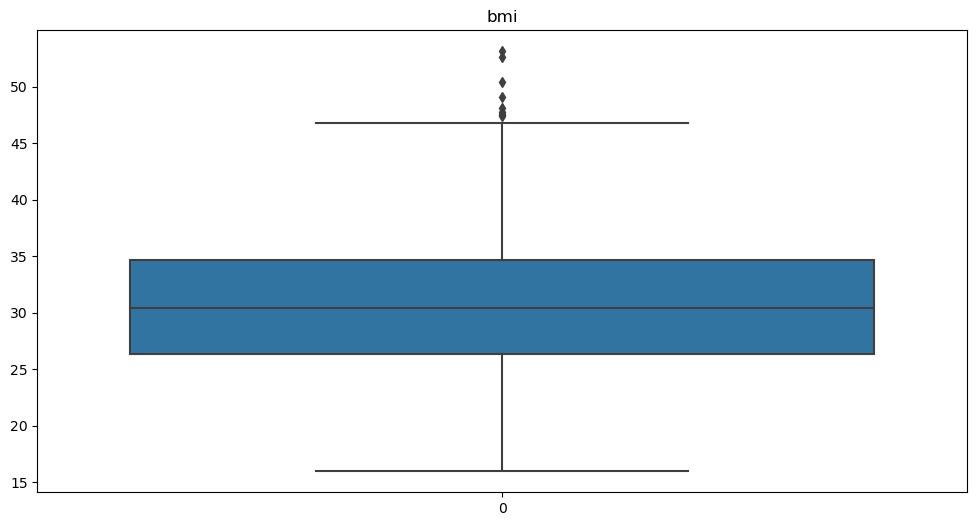

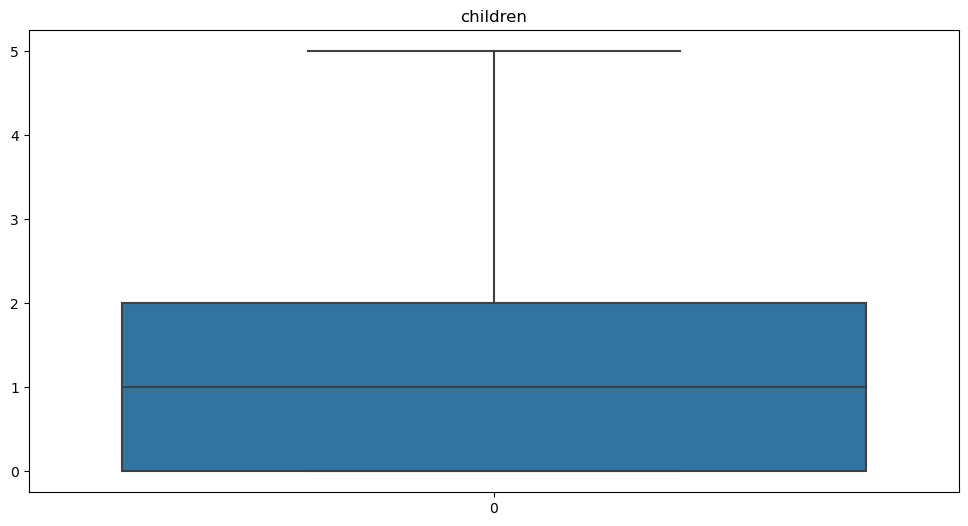

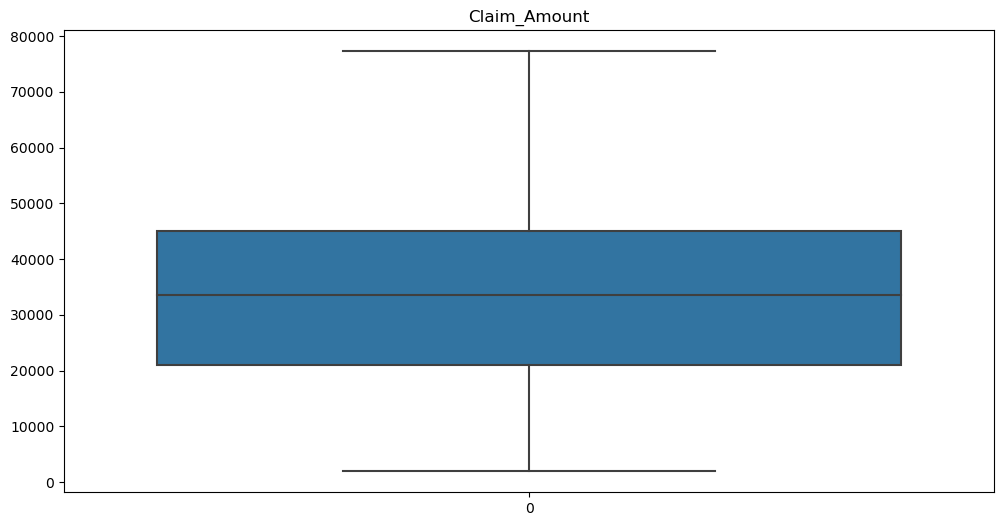

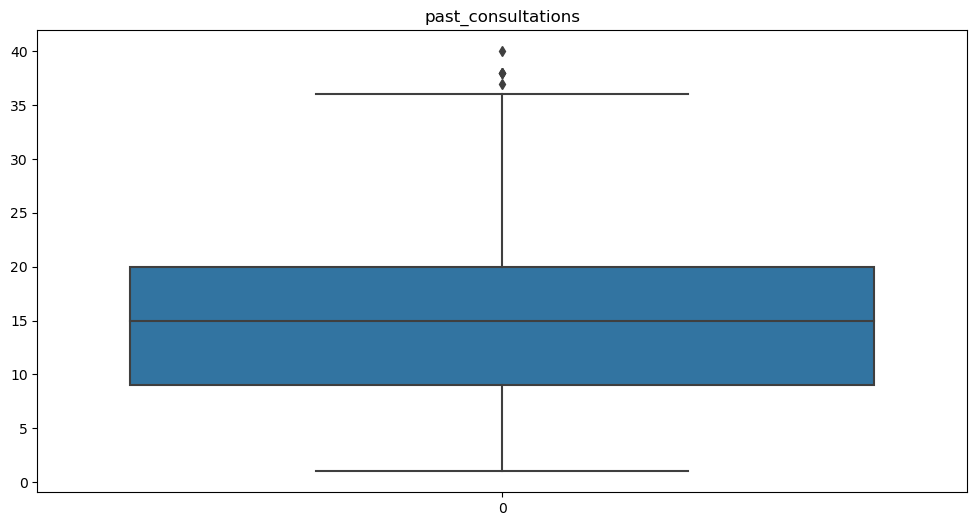

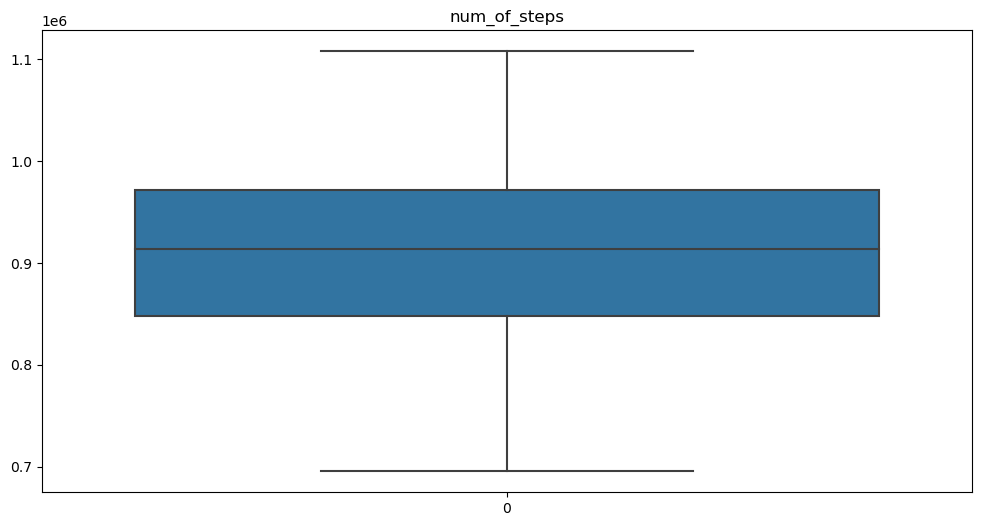

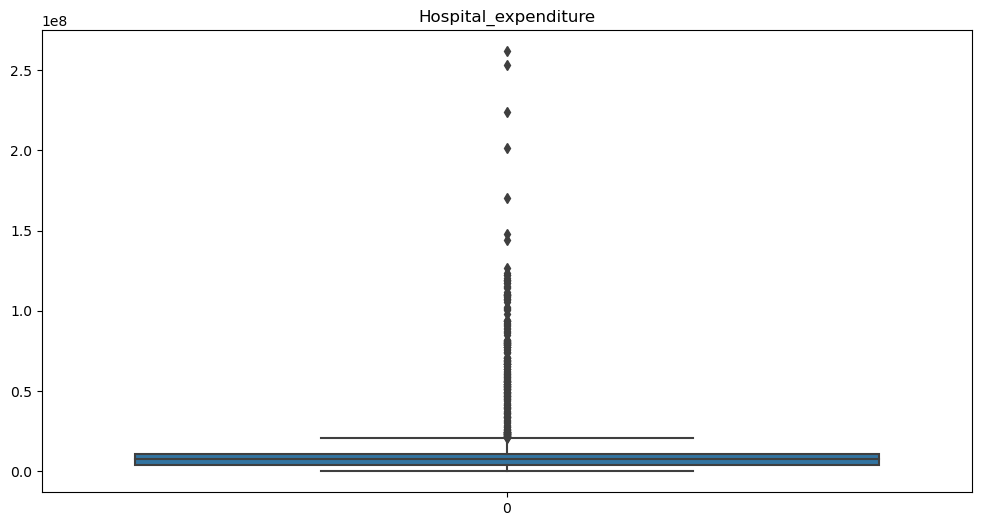

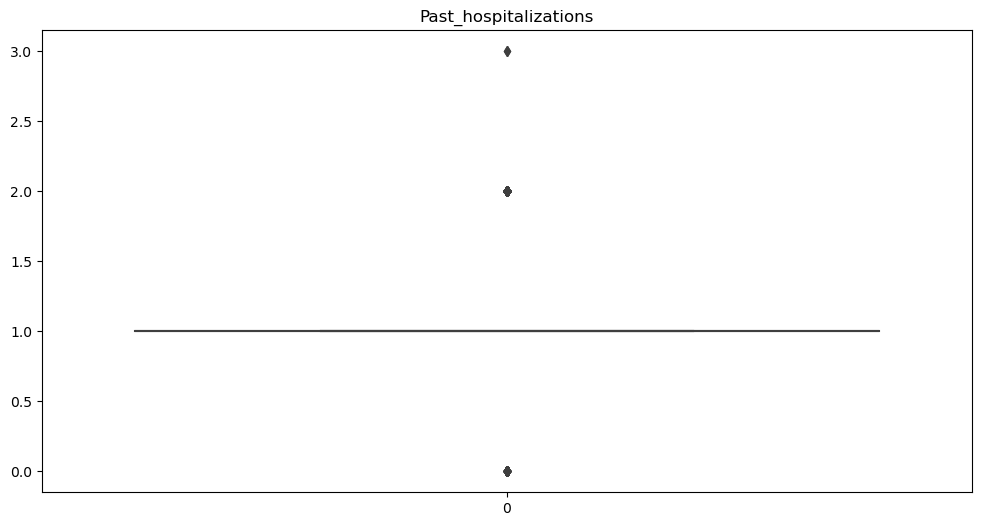

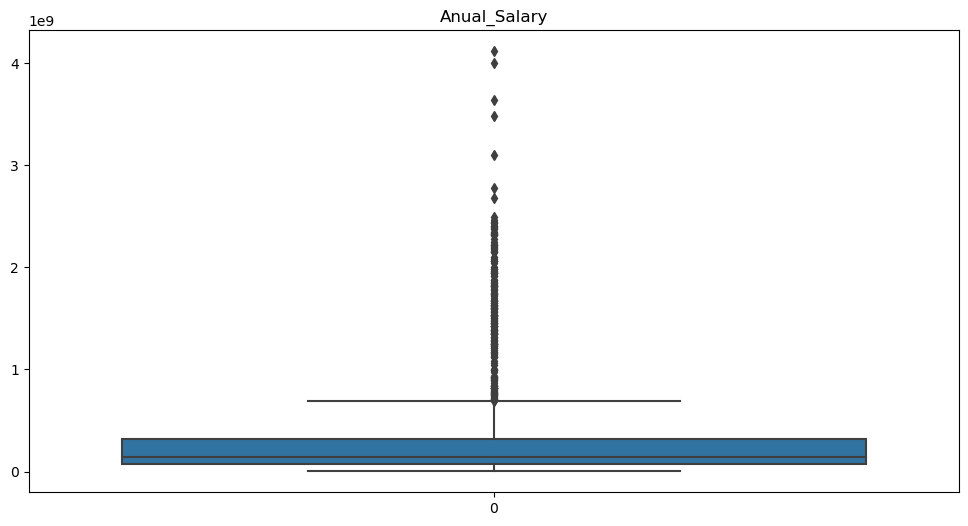

In [17]:
X = dataset.drop(columns=['charges','sex','smoker','region'],axis=1)
X.columns
for col in X.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(X[col])
    plt.title(col)

# Checking age distribution by Gender

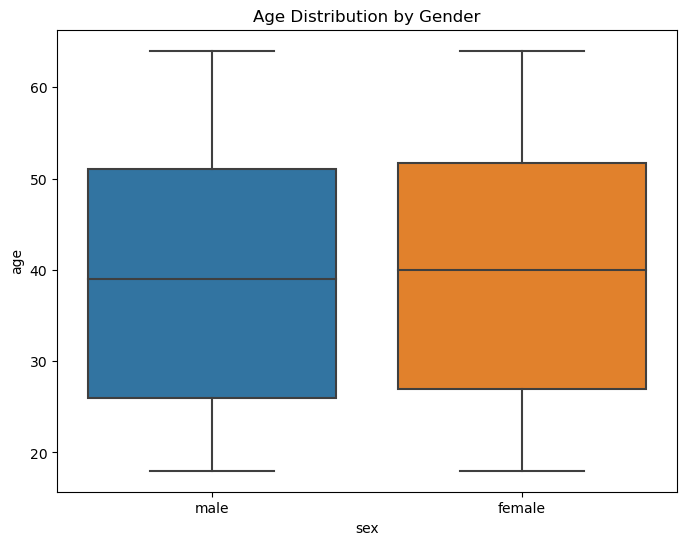

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=dataset)
plt.title('Age Distribution by Gender')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

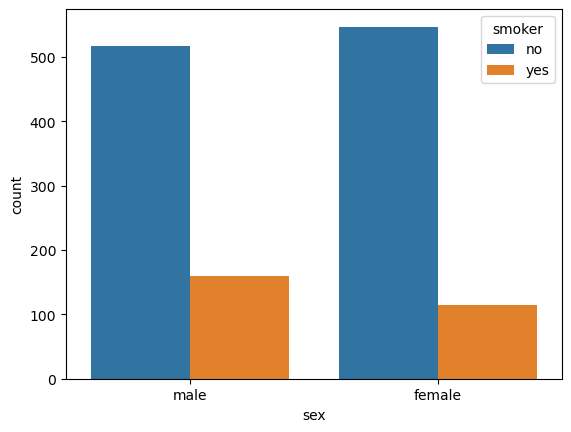

In [19]:
sns.countplot(x='sex', hue = 'smoker' ,data= dataset)

# Comparison of Hospital Expenditure, Charges and Claim Amount between Smokers and Non-Smokers

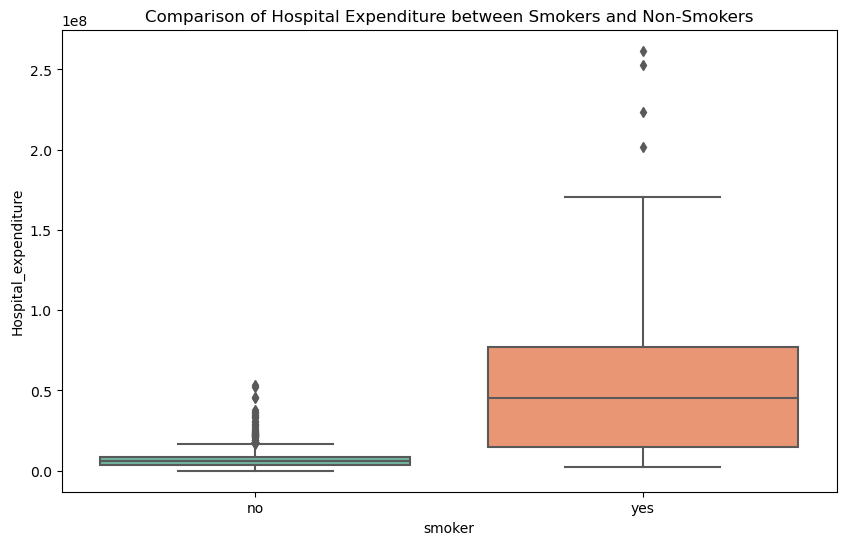

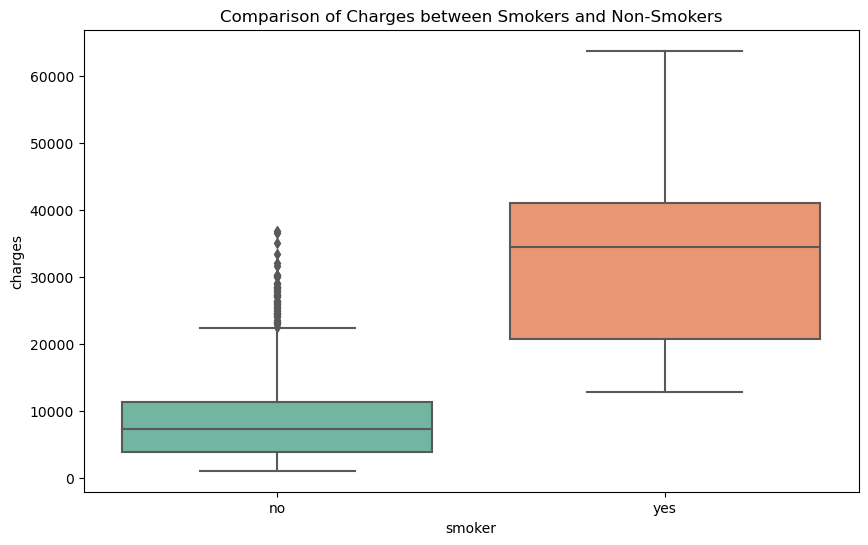

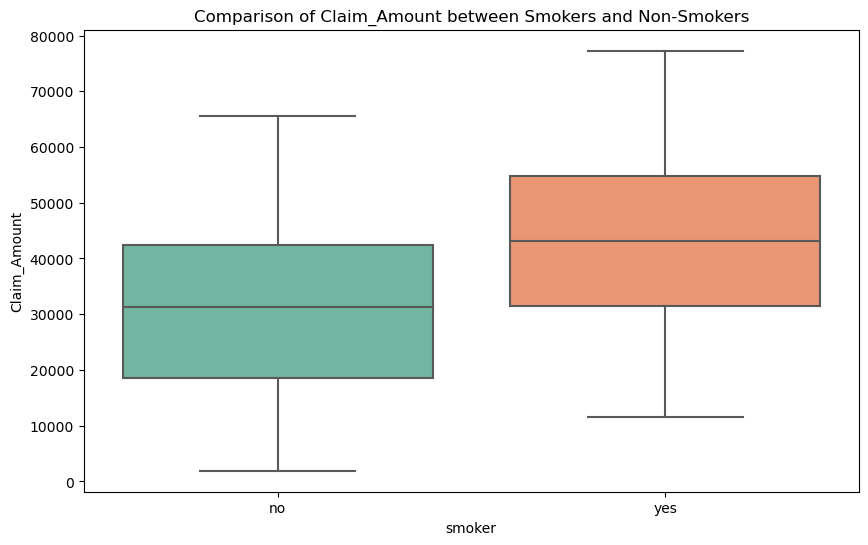

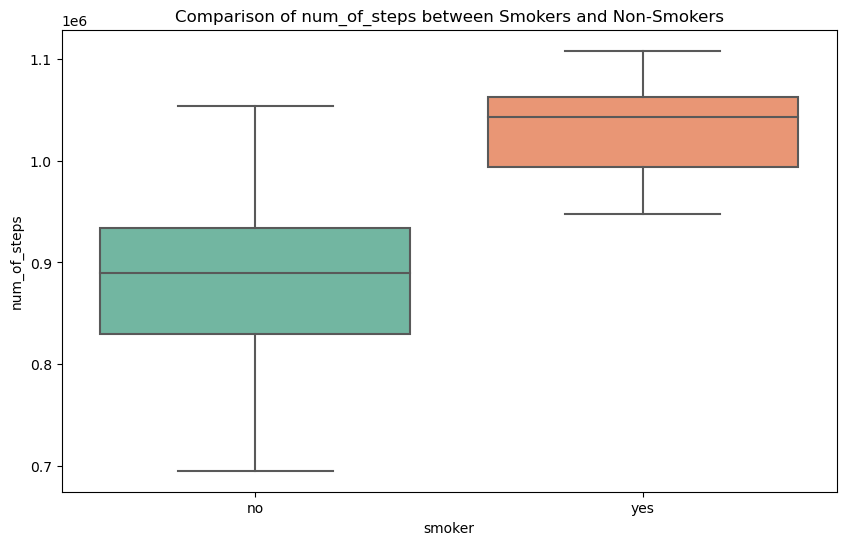

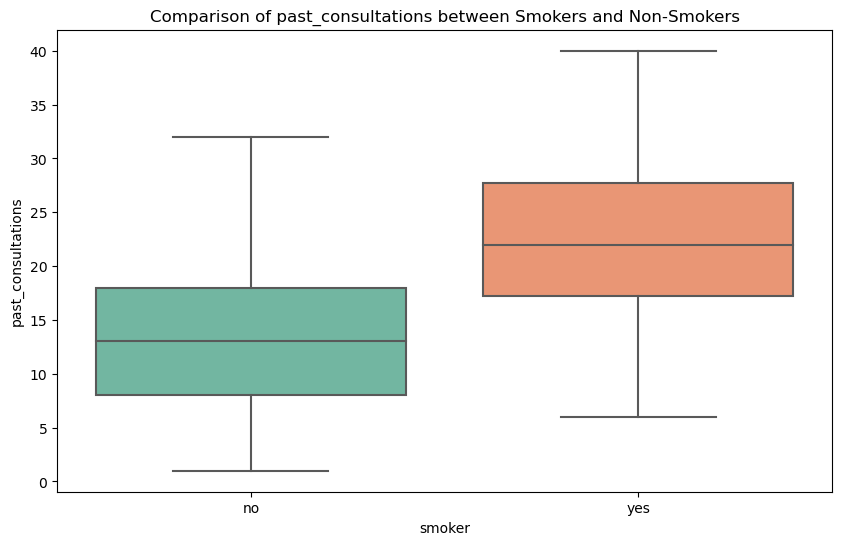

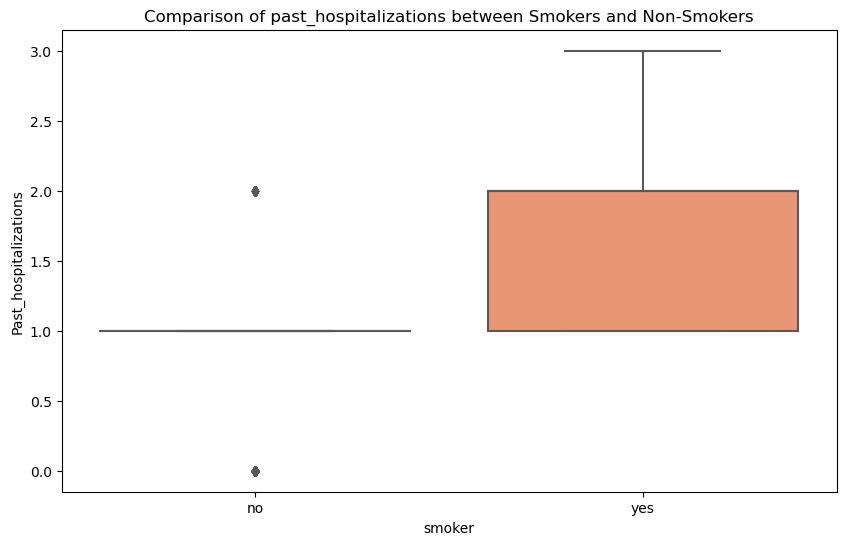

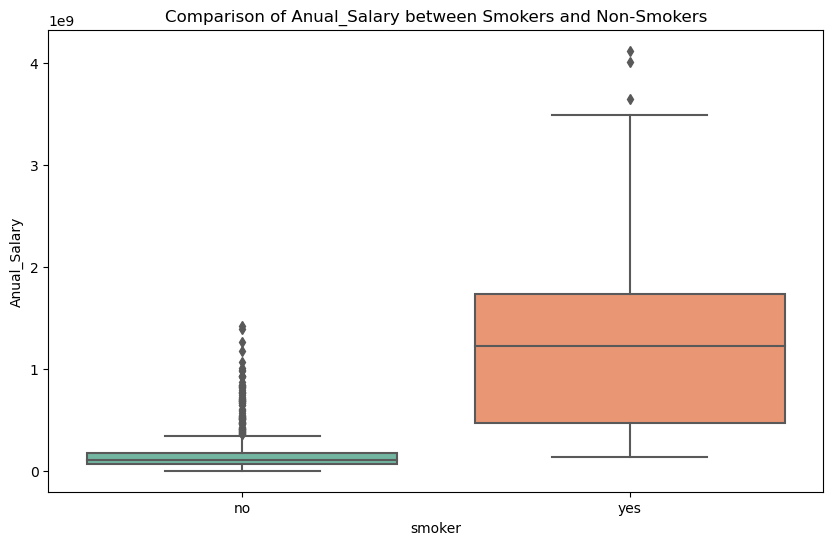

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='Hospital_expenditure', data=dataset, palette='Set2')
plt.title('Comparison of Hospital Expenditure between Smokers and Non-Smokers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=dataset, palette='Set2')
plt.title('Comparison of Charges between Smokers and Non-Smokers')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='Claim_Amount', data=dataset, palette='Set2')
plt.title('Comparison of Claim_Amount between Smokers and Non-Smokers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='num_of_steps', data=dataset, palette='Set2')
plt.title('Comparison of num_of_steps between Smokers and Non-Smokers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='past_consultations', data=dataset, palette='Set2')
plt.title('Comparison of past_consultations between Smokers and Non-Smokers')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='Past_hospitalizations', data=dataset, palette='Set2')
plt.title('Comparison of past_hospitalizations between Smokers and Non-Smokers')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='Anual_Salary', data=dataset, palette='Set2')
plt.title('Comparison of Anual_Salary between Smokers and Non-Smokers')
plt.show()

# Assigning Obese, underweight, overweight and Normal as category for BMI

In [21]:
def classify_bmi(bmi):
    if bmi >= 30:
        return 'Obese'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    else:
        return 'Underweight'

# Apply the function to create a new column 'BMI_Category'
dataset['BMI_Category'] = dataset['bmi'].apply(classify_bmi)

<Axes: xlabel='BMI_Category', ylabel='count'>

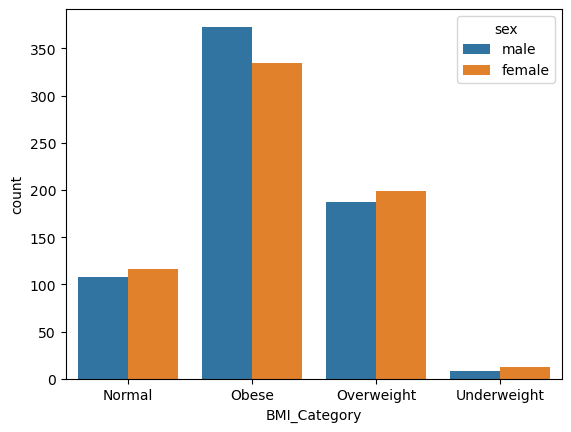

In [22]:
sns.countplot(x='BMI_Category', hue = 'sex' ,data= dataset)

# Comparison of Hospital Expenditure, Charges and Claim Amount among BMI Categories

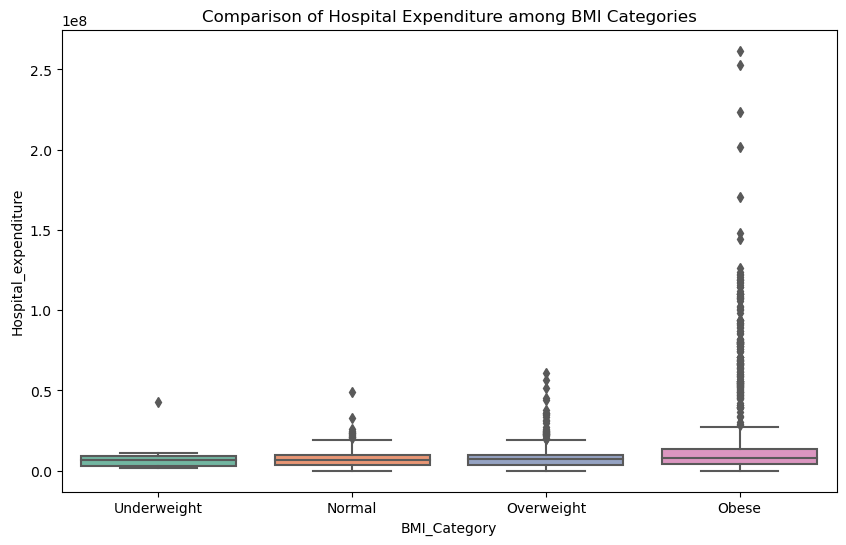

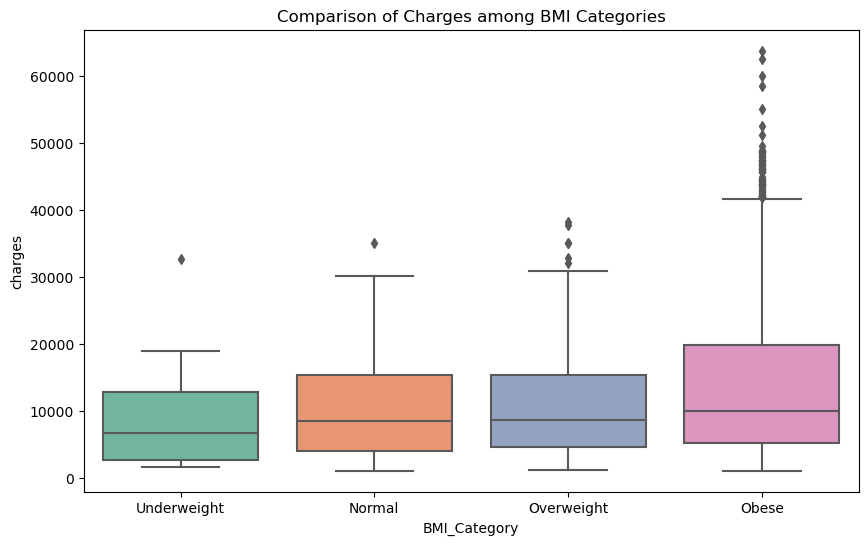

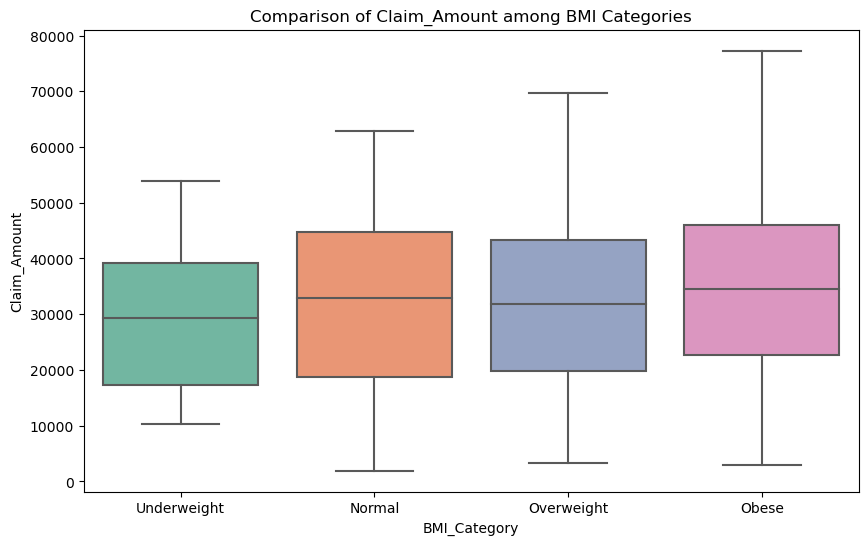

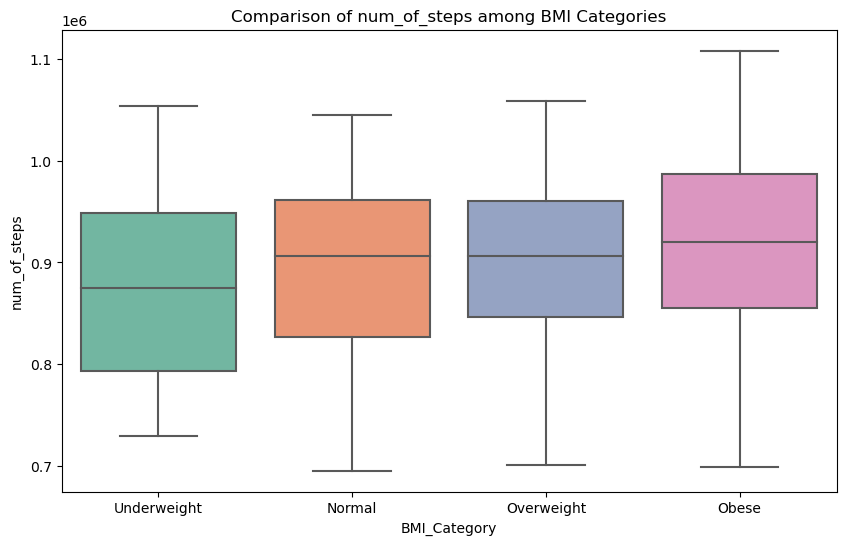

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Category', y='Hospital_expenditure', data=dataset, palette='Set2', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Comparison of Hospital Expenditure among BMI Categories')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Category', y='charges', data=dataset, palette='Set2', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Comparison of Charges among BMI Categories')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Category', y='Claim_Amount', data=dataset, palette='Set2', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Comparison of Claim_Amount among BMI Categories')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_Category', y='num_of_steps', data=dataset, palette='Set2', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Comparison of num_of_steps among BMI Categories')
plt.show()


<Figure size 4000x4000 with 0 Axes>

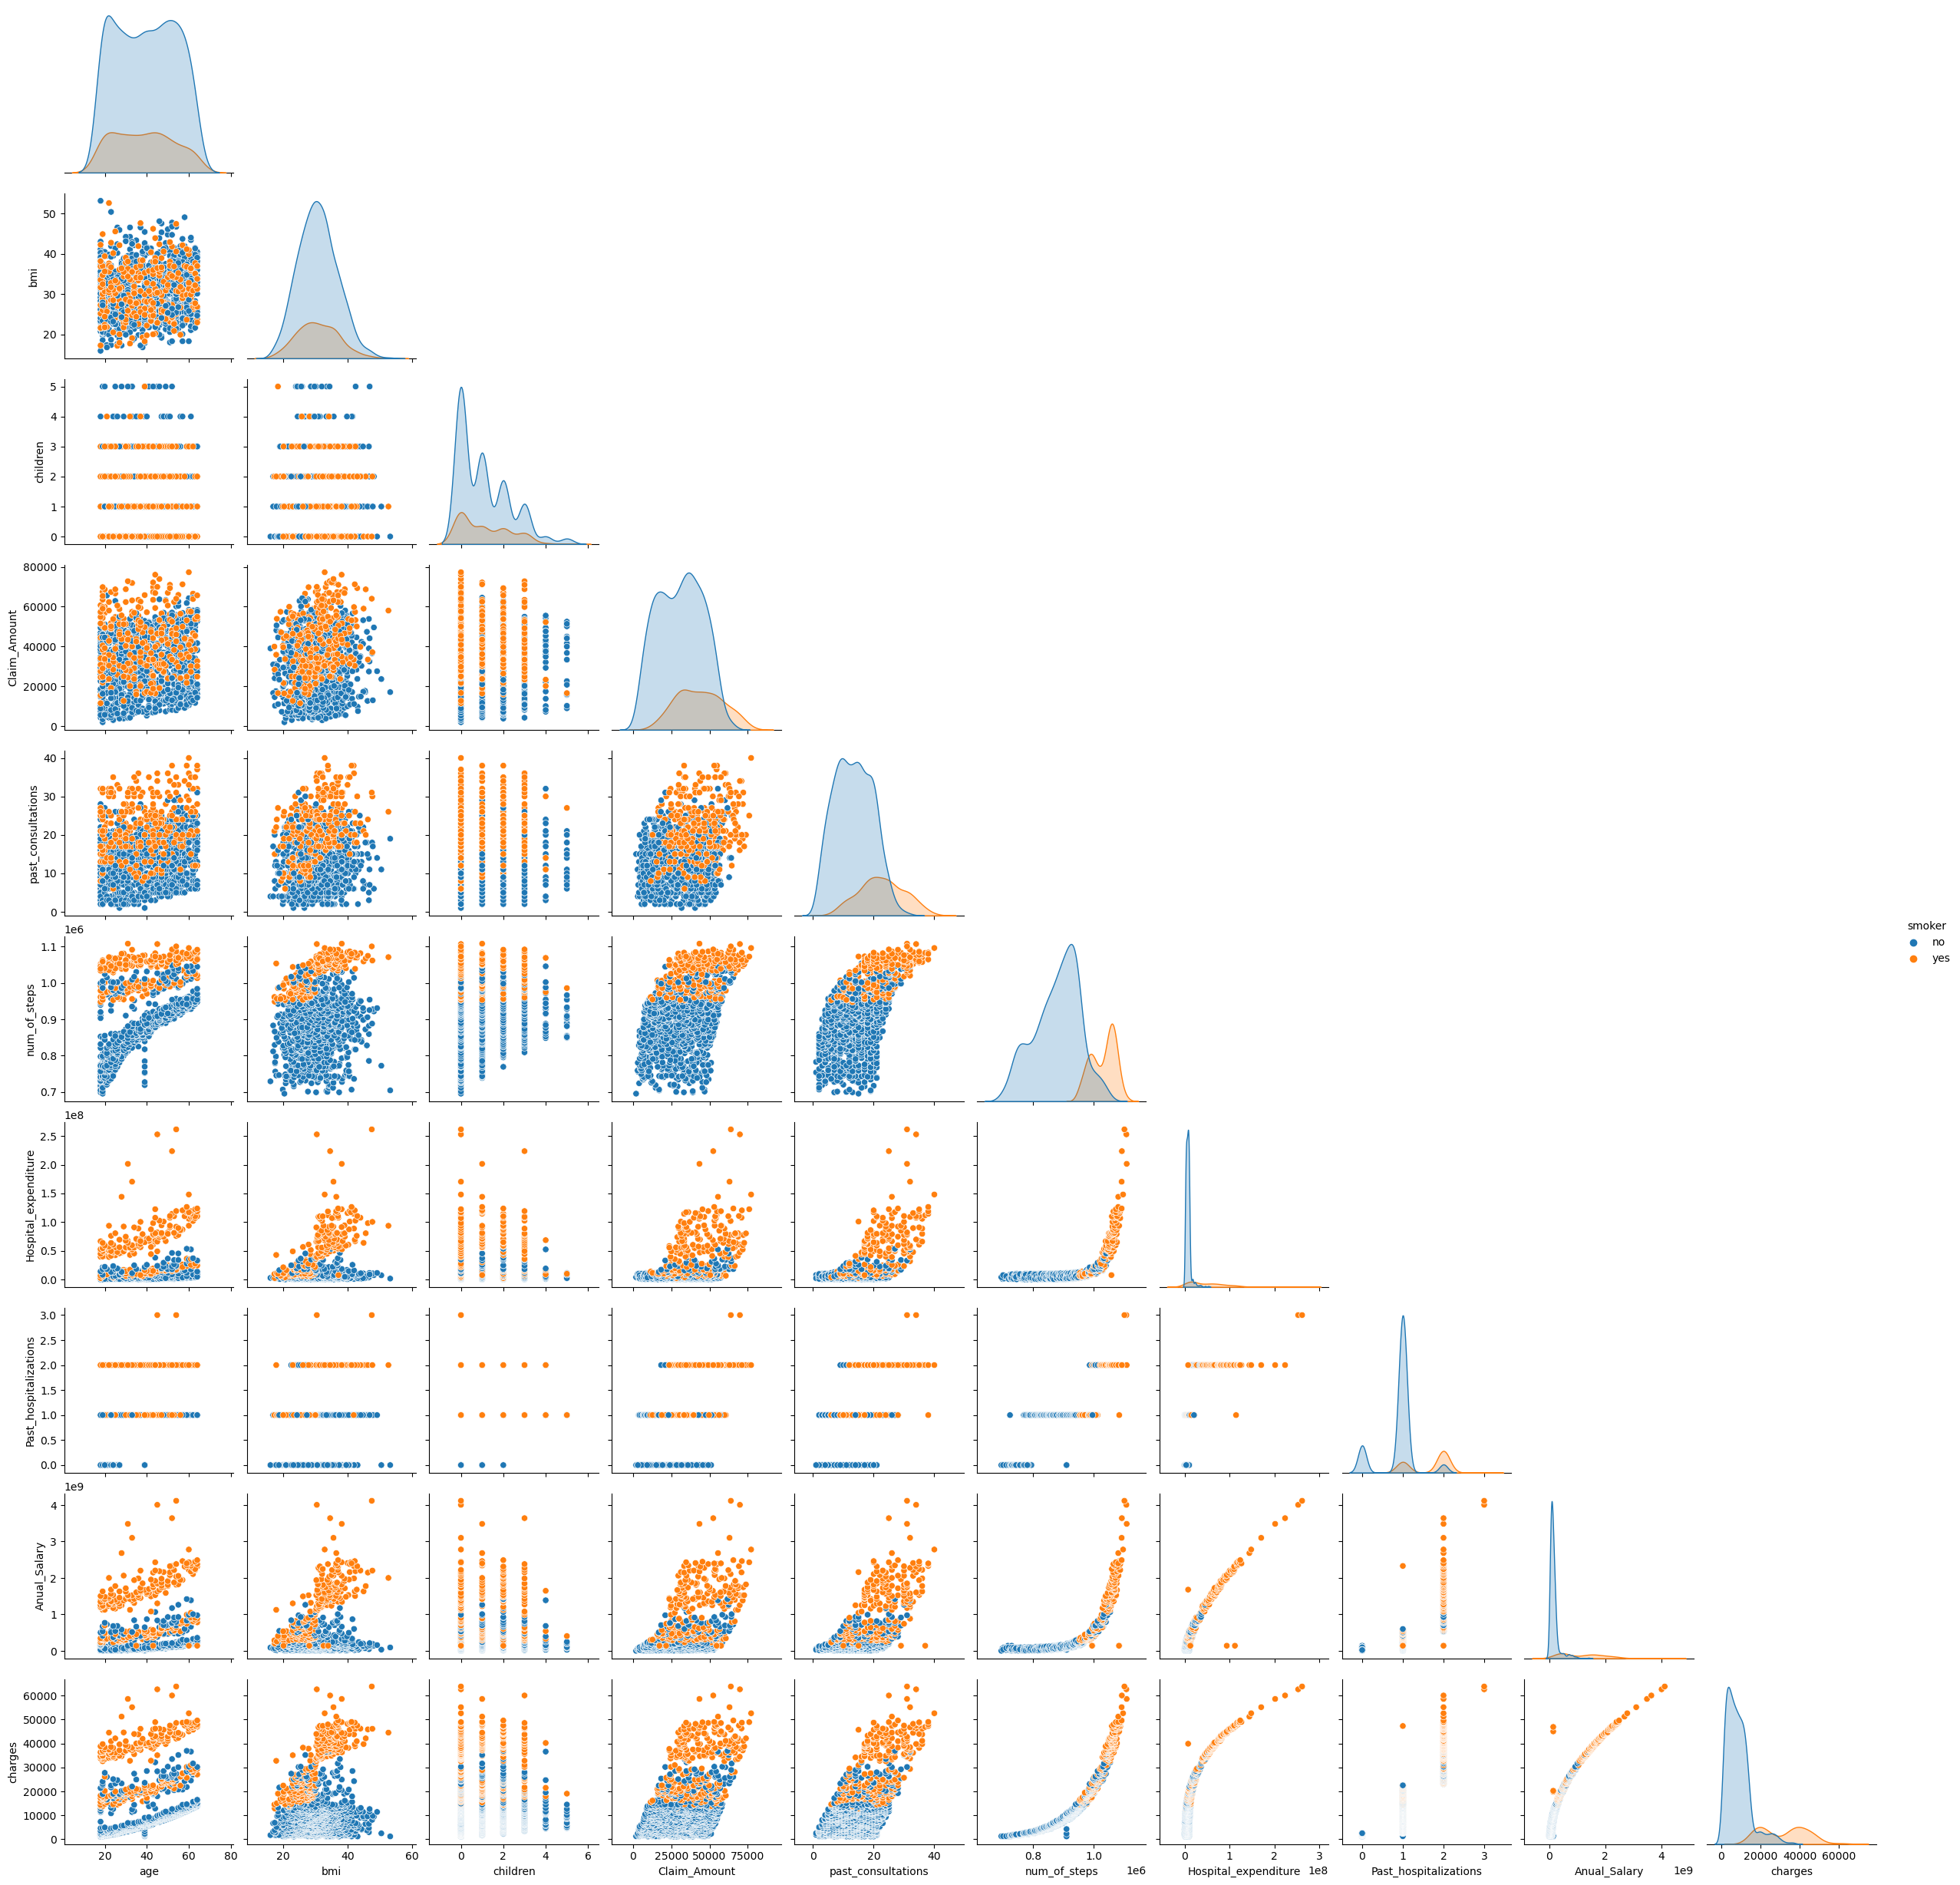

In [24]:
plt.figure(figsize=(40,40))
sns.pairplot(data=dataset, hue='smoker', corner = True)

# For machine learning we need to convert all the categorical variables into numbers

In [25]:
dataset

age     sex     bmi  children smoker  Claim_Amount  past_consultations  \
0      18    male  23.210         0     no   29087.54313                  17   
1      18    male  30.140         0     no   39053.67437                   7   
2      18    male  33.330         0     no   39023.62759                  19   
3      18    male  33.660         0     no   28185.39332                  11   
4      18    male  34.100         0     no   14697.85941                  16   
...   ...     ...     ...       ...    ...           ...                 ...   
1333   33  female  35.530         0    yes   63142.25346                  32   
1334   31  female  38.095         1    yes   43419.95227                  31   
1335   52    male  34.485         3    yes   52458.92353                  25   
1336   45    male  30.360         0    yes   69927.51664                  34   
1337   54  female  47.410         0    yes   63982.80926                  31   

      num_of_steps  Hospital_expenditure  Past_hospitalizations  Anual_Salary  \
0           715428          4.720921e+06                      0  5.578497e+07   
1           699157          4.329832e+06                      0  1.370089e+07   
2           702341          6.884861e+06                      0  7.352311e+07   
3           700250          4.274774e+06                      0  7.581968e+07   
4           711584          3.787294e+06                      0  2.301232e+07   
...            ...                   ...                    ...           ...   
1333       1091267          1.703805e+08                      2  3.101107e+09   
1334       1107872          2.015152e+08                      2  3.484216e+09   
1335       1092005          2.236450e+08                      2  3.640807e+09   
1336       1106821          2.528924e+08                      3  4.006359e+09   
1337       1100328          2.616317e+08                      3  4.117197e+09   

         region      charges BMI_Category  
0     southeast   1121.87390       Normal  
1     southeast   1131.50660        Obese  
2     southeast   1135.94070        Obese  
3     southeast   1136.39940        Obese  
4     southeast   1137.01100        Obese  
...         ...          ...          ...  
1333  northwest  55135.40209        Obese  
1334  northeast  58571.07448        Obese  
1335  northwest  60021.39897        Obese  
1336  southeast  62592.87309        Obese  
1337  southeast  63770.42801        Obese  

[1338 rows x 14 columns]

In [26]:
df = pd.DataFrame(dataset)


label_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3}

df['BMI_Label'] = df['BMI_Category'].map(label_mapping)


In [27]:
df.drop('BMI_Category', axis=1, inplace=True)
df.drop('bmi', axis=1, inplace=True)


<Figure size 4000x4000 with 0 Axes>

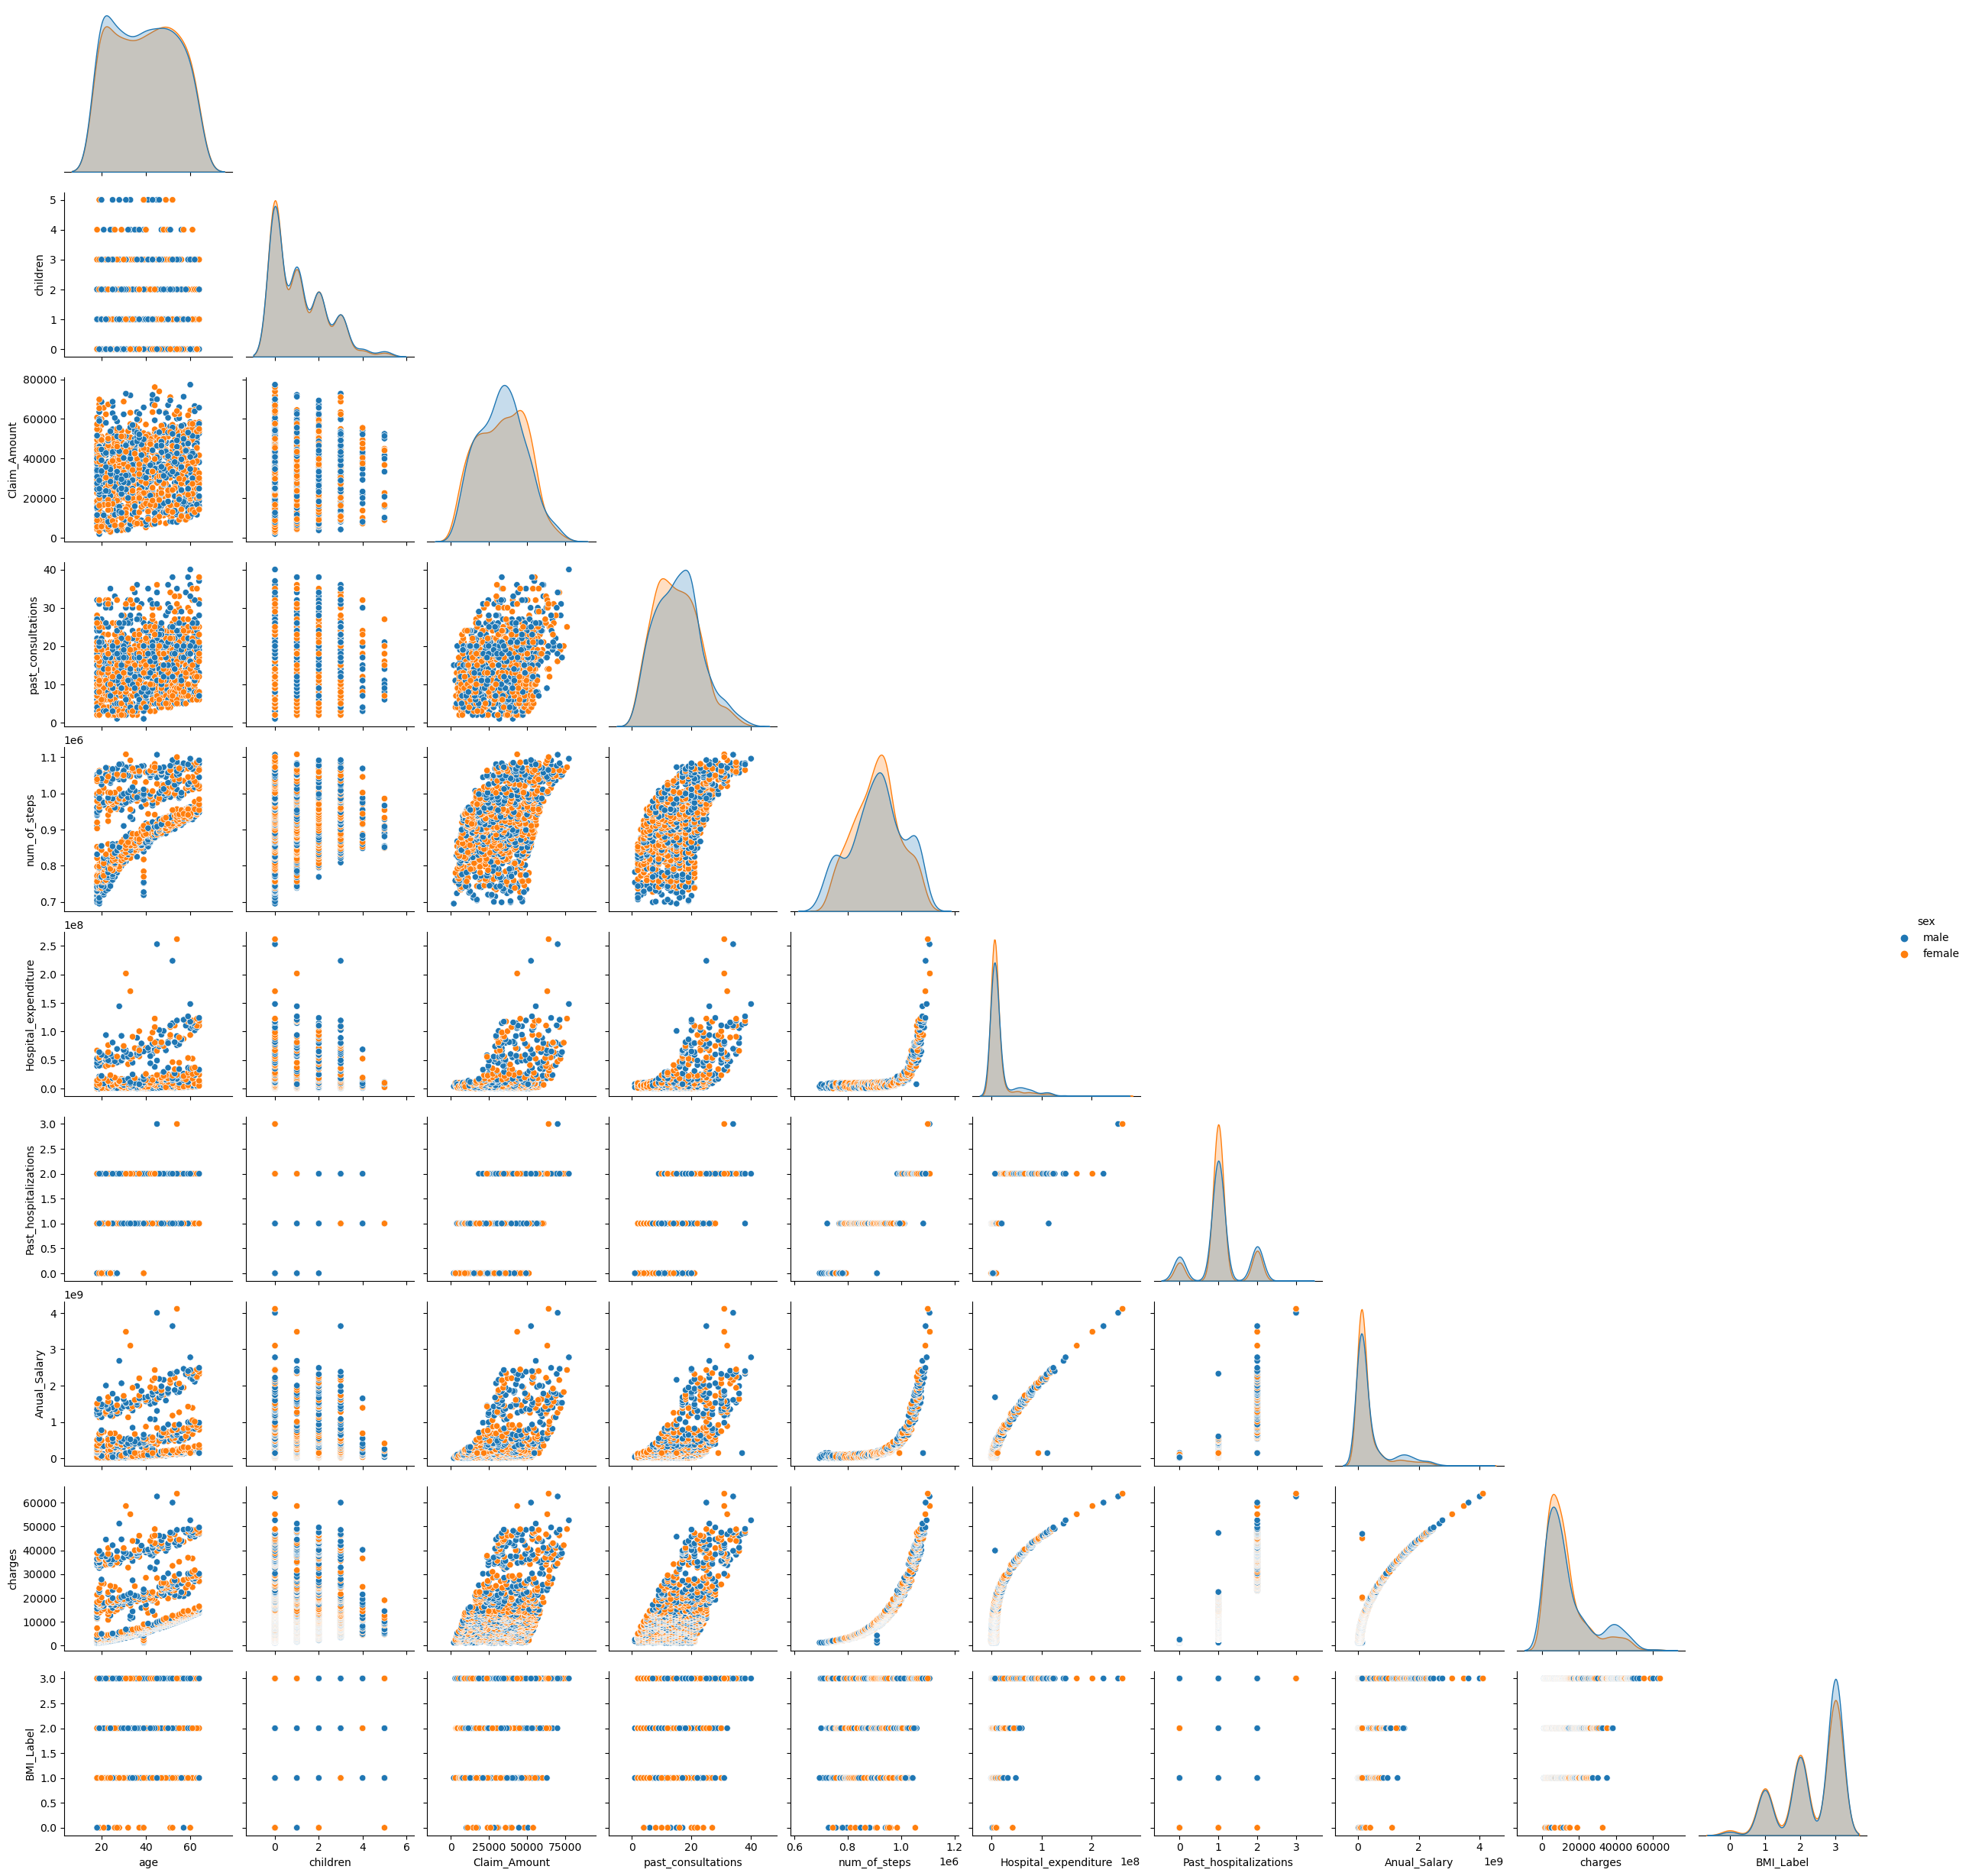

In [28]:
plt.figure(figsize=(40,40))
sns.pairplot(data=df, hue='sex', corner = True)

# Feature Engineering

In [29]:
df_encoded = pd.get_dummies(df,columns = ['sex', 'smoker', 'region'],drop_first = True) 

In [30]:
df_encoded = df_encoded.astype(int)

# Checking multicollinearlity

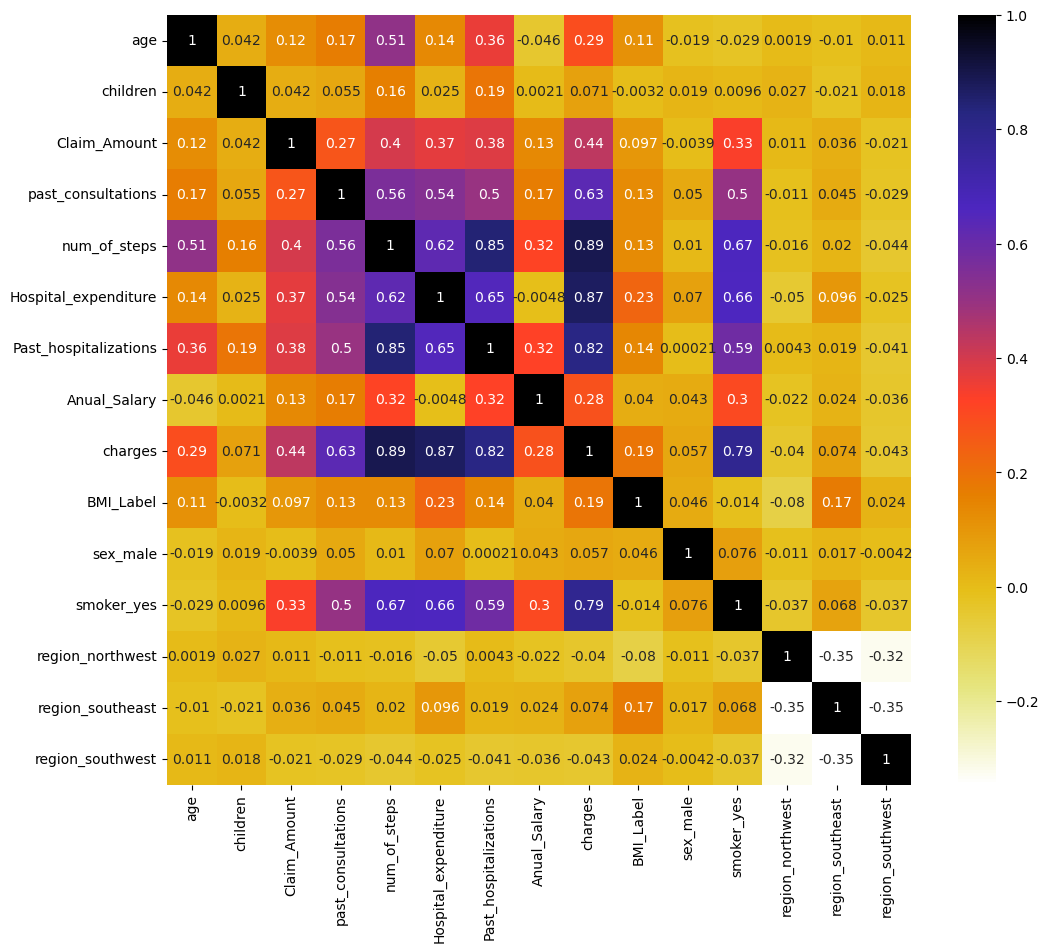

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Checking data distribution

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

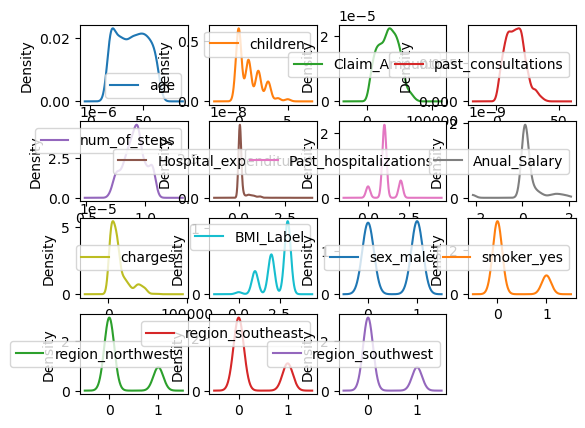

In [32]:
df_encoded.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

# Report

- The number of males and females are similar. 
- The number of male smokers is slightly higher than females smokers
- We can see a significant difference between smokers and non-smokers in terms of hospital expenditure, premium charges, claim amount, past consultation, past hospitalization and annual salary where smokers fare higher in each category than non-smokers.
- The number of steps are higher in smoker than non-smoker
- We have higher number of obese individuals than any other category in both males and females.

# Model Building

# Dividing the data to test and train data

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X=df_encoded.drop(columns=['charges'], axis=1)
y=df_encoded['charges']

# Train Test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((1003, 14), (335, 14))

In [35]:
X_train.corr()

age  children  Claim_Amount  past_consultations  \
age                    1.000000  0.032080      0.118249            0.163076   
children               0.032080  1.000000      0.021658            0.063873   
Claim_Amount           0.118249  0.021658      1.000000            0.257597   
past_consultations     0.163076  0.063873      0.257597            1.000000   
num_of_steps           0.523094  0.170000      0.389625            0.552821   
Hospital_expenditure   0.121762  0.032298      0.381171            0.546338   
Past_hospitalizations  0.359183  0.196675      0.368498            0.474430   
Anual_Salary          -0.060790  0.009787      0.124397            0.141081   
BMI_Label              0.089356 -0.015364      0.083671            0.103513   
sex_male               0.014086  0.037198     -0.002790            0.051101   
smoker_yes            -0.029128  0.030437      0.343981            0.511605   
region_northwest      -0.024174  0.015627      0.020530           -0.033056   
region_southeast       0.003737 -0.005810      0.039290            0.042163   
region_southwest       0.025433  0.028079     -0.054860           -0.025593   

                       num_of_steps  Hospital_expenditure  \
age                        0.523094              0.121762   
children                   0.170000              0.032298   
Claim_Amount               0.389625              0.381171   
past_consultations         0.552821              0.546338   
num_of_steps               1.000000              0.625743   
Hospital_expenditure       0.625743              1.000000   
Past_hospitalizations      0.838315              0.646280   
Anual_Salary               0.312375             -0.012007   
BMI_Label                  0.102905              0.214010   
sex_male                   0.027420              0.089585   
smoker_yes                 0.662035              0.671260   
region_northwest          -0.042875             -0.068717   
region_southeast           0.029604              0.107166   
region_southwest          -0.040382             -0.039153   

                       Past_hospitalizations  Anual_Salary  BMI_Label  \
age                                 0.359183     -0.060790   0.089356   
children                            0.196675      0.009787  -0.015364   
Claim_Amount                        0.368498      0.124397   0.083671   
past_consultations                  0.474430      0.141081   0.103513   
num_of_steps                        0.838315      0.312375   0.102905   
Hospital_expenditure                0.646280     -0.012007   0.214010   
Past_hospitalizations               1.000000      0.318435   0.116686   
Anual_Salary                        0.318435      1.000000   0.024247   
BMI_Label                           0.116686      0.024247   1.000000   
sex_male                            0.018188      0.029204   0.049906   
smoker_yes                          0.585860      0.298739  -0.023716   
region_northwest                   -0.020595     -0.021342  -0.068895   
region_southeast                    0.027378      0.008263   0.166940   
region_southwest                   -0.039112     -0.035848  -0.004803   

                       sex_male  smoker_yes  region_northwest  \
age                    0.014086   -0.029128         -0.024174   
children               0.037198    0.030437          0.015627   
Claim_Amount          -0.002790    0.343981          0.020530   
past_consultations     0.051101    0.511605         -0.033056   
num_of_steps           0.027420    0.662035         -0.042875   
Hospital_expenditure   0.089585    0.671260         -0.068717   
Past_hospitalizations  0.018188    0.585860         -0.020595   
Anual_Salary           0.029204    0.298739         -0.021342   
BMI_Label              0.049906   -0.023716         -0.068895   
sex_male               1.000000    0.068654         -0.030672   
smoker_yes             0.068654    1.000000         -0.048469   
region_northwest      -0.030672   -0.048469       

# Model Selection For Regression
- Model selection process
- Fine tune and Finalize the model

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg_pred = lreg.predict(X_test)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.9724
MAE value: 1496.8303


# Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression
R2 Score value: 0.9725
MAE value: 1496.3517


# Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.9724
MAE value: 1496.7188


# Support Vector Regressor

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: -0.1261
MAE value: 9091.6123


# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9971
MAE value: 435.2832


# K-Nearest-Neighbors Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.9778
MAE value: 1391.6860


# Accuracy Score Summary

|     Models              | Accuracy score | 
|:-----------------------:|:--------------:|
|Linear Regression      |  97.24%       |  
|Ridge Regression       |  97.24%        |  
|Random Forest Regressor|  99.73%      |
|K_Neighbours Regressor|12.61%|
|Lasso Regression|97.25%|
|Support Vector Regressor|58.18%|

# Hyperparameter tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [43]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9933
MAE value: 501.1361


# Pickling the file

In [44]:
import pickle 
pickle.dump(best_random_grid, open('R_model.pkl','wb'))

# Testing pickle file

In [45]:
#testing pickle file 
test_pickle = pickle.load(open('R_model.pkl','rb'))
bestrf_tpred = test_pickle.predict(X_test)
r2 = r2_score(y_test, bestrf_tpred)
r2

0.9933370435703306